In [ ]:
!pip install seaborn

Before we get started, install the above library

# Regression

Regression analysis is a supervised learning technique used to model and understand the relationship beween a dependent variable (target variable) and one or more independent variables (predictor variables). The objective of this is to create a function that best maps the input variables to a suitable outcome, essentially trying to predict future values given the history of the pattern between the value of the input and output data. It's useful for forecasting continous values (temperatures, stock prices, agricultural growth) and identifying how changes in independent variables influence the dependent variable.

There are many regression algorithms, for this notebook we will be covering the following:
- **Simple Linear Regression:** Assumes a linear relationship between the variables, with **one independent** variable.
- **Multiple Linear Regression:** Assumes a linear relationship between the variables, with **multiple** independent variable.
- **Logistic Regression:** Used for classification tasks where the dependent variable is categorical.

As an Extension, you could look into:
- **Polynomial Regression:** Models non-linear relationships between the variables
- **Ridge and Lasso Regression:** Linear regression techniques that prevent overfitting.

This notebook only uses three external libraries.
- pandas for reading and manipulating our data.
- numpy for built-in math functions
- matplotlib to display our data in graphs and visualise results.
- sklearn for built-in machine learning functions to calculate linear regression

# Part 1: Simple Linear Regression with Height and Weight data

In this section, we go over the basic steps towards making a simple linear regression model, using the following basic steps:

1. Importing the Necessary Libraries
2. Loading and Exploring the Dataset
3. Preparing the Data (splitting into training and testing)
4. Creating and Training the Model
5. Making Predictions with the Model
6. Evaluating the Model

For the example, we will consider a dataset of [25,000 Human Heights (inches) and Weights (pounds)](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights). The goal of this section is to predict the weight of a human in pounds, given their height in inches.


## Step 1: Importing the Necessary Libraries

In [1]:
# numpy for linear algebra support
import numpy as np

# pandas for data manipulation and analysis
import pandas as pd

# matplotlib is our main data plotting library
import matplotlib.pyplot as plt

# sklearn is go to library for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Step 2: Loading and Exploring the Dataset

There are two main types of linear regression. Simple Linear Regression assumes one independent variable and one dependent variable. The equation for simple linear regression is $ y = \mathcal{\beta_0} + \mathcal{\beta_1} X $
where:
- $ y $ is the dependent variable
- $ X $ is the independent variable
- $ \mathcal{\beta_0} $ is the intercept
- $ \mathcal{\beta_1} $ is the slope

if you want more information on linear regression, you can [visit the wiki](https://en.wikipedia.org/wiki/Linear_regression).

In [2]:
# data path to our CSV dataset
data_path = "data/SOCR-HeightWeight.csv"

# load the data into a pandas dataframe
df = pd.read_csv(data_path)
df

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


What type of data is this? What different types of data do you think we can use for machine learning? How would you categorise them? Try writing them down!

Hint: Structured vs Unstructured data

[Answer](https://kili-technology.com/training-data/unstructured-data-vs-structured-data-know-the-difference-and-its-impact-on-your-ml-pipeline)

In [3]:
# what does the data look like? head shows the first 5 rows by default, however try passing a number to see more or less rows
df.head(10)

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
5,6,68.69784,123.3024
6,7,69.80204,141.4947
7,8,70.01472,136.4623
8,9,67.90265,112.3723
9,10,66.78236,120.6672


Now the data is loaded, we can do some preliminary analysis on the data so we know the data we are feeding our model is correct.

In [4]:
# dimensions of the dataframe, rows, columns
df.shape

(25000, 3)

In [5]:
# info gives us a summary of the data, including the number of non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [6]:
# describe gives us a statistical summary of the data in a pretty column, including the mean, standard deviation, minimum, maximum, and quartiles
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [7]:
# sometimes we need to rename columns to make them more readable, inplace=True means we are changing the dataframe in place so we overwrite the original
df.rename(columns={'Height(Inches)': 'Height'}, inplace=True)
df.rename(columns={'Weight(Pounds)': 'Weight'}, inplace=True)

Linear regression involves various mathematical operations such as matrix multiplications, inversions, and summations. Null values can disrupt these operations, leading to computational errors or undefined results. So we want to delete null values. In some situations we can impute data, which replaces null values with estimated values based on the dataset, and some models can handle missing data directly.

I have edited the original dataset to have some nulls for us to remove.

In [8]:
df.isnull().sum()

Index     0
Height    0
Weight    0
dtype: int64

In [9]:
df

,Index,Height,Weight
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


## Step 3: Preparing the Data

In [10]:
# X is our input data (independent variable), we are using the height column as our input, in sklearn we need to pass a 2D array so we use double brackets
X = df[['Height']]

# y is our output data (dependent variable), we are using the weight column as our output, as we are predicting weight from height
y = df['Weight']

In [11]:
# we split our data into training and testing data, the test size means we are using 10% of the data for testing and 90% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [12]:
len(X_train), len(X_test), len(y_train), len(y_test)

(22500, 2500, 22500, 2500)

## Step 4: Creating and Training the Model

Read more about the parameters passed into linear regression models [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [13]:
# we create a linear regression model
model = LinearRegression()

# we fit the model to our training data
model.fit(X_train, y_train)

LinearRegression()

## Step 5: Making Predictions with the Model

Now we want to use our model on the testing data, to see how well it makes predictions

In [14]:
y_pred = model.predict(X_test)

## Step 6: Evaluating the Model

For regression problems, common evaluation metrics include:
- **Mean Squared Error (MSE):** the square root of the variance of the residuals. It specifies the absolute fit of the model to the data i.e. how close the observed data points are to the predicted values. [Read more here](https://en.wikipedia.org/wiki/Mean_squared_error).
- **Coefficient of Determination:** explains the amount of variation that is captured by our fitted model, it always ranges between 0 & 1. Overall, the higher the value of R-squared, the better the model fits the data. [Read more here](https://en.wikipedia.org/wiki/Coefficient_of_determination).

The metrics we can call quantiative analysis, however we also use qualitiative methods such as graphs and charts to draw some conclusions.

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 101.68041786822707
R^2 Score: 0.27109307815128203


In [16]:
# this snippet of code is to explain how you might go about sorting your predictions, what values did the model predict well and what values did it predict poorly?

# calculate the absolute differences between actual and predicted values
differences = np.abs(y_test - y_pred)

# create a dataframe to store the results
results = pd.DataFrame({'Height': X_test['Height'], 'Actual_Weight': y_test, 'Predicted_Weight': y_pred, 'Difference': differences})

# sort the results by the absolute difference
sorted_results = results.sort_values(by='Difference')

In [17]:
# display the 5 best predictions
print("5 Best Predictions:")
sorted_results.head(5)

5 Best Predictions:


,Height,Actual_Weight,Predicted_Weight,Difference
3673,64.68881,116.9304,116.940942,0.010542
18932,63.60255,113.6185,113.605896,0.012604
3073,68.70040,129.2788,129.257361,0.021439
8919,66.86786,123.6055,123.631080,0.025580
22930,71.24956,137.0562,137.083815,0.027615


In [18]:
# display the 5 worst predictions
print("5 Worst Predictions:")
sorted_results.tail(5)

5 Worst Predictions:


,Height,Actual_Weight,Predicted_Weight,Difference
17598,66.52168,90.28757,122.568236,32.280666
11753,70.38460,166.76870,134.428207,32.340493
21101,65.84174,85.98927,120.480678,34.491408
15005,65.47213,83.33859,119.345898,36.007308
24610,66.56804,82.38298,122.710570,40.327590


In [19]:
# the intercept represents the predicted value of your dependent variable (y) when all your independent variables (x) are zero.
print(f"Intercept: {model.intercept_}")

# the coefficient represents the average change in your dependent variable (y) for a one-unit increase in your independent variable (x), assuming all other variables are held constant.
print(f"Coefficient: {model.coef_[0]}")

Intercept: -81.66722327639528
Coefficient: 3.0702089723946924


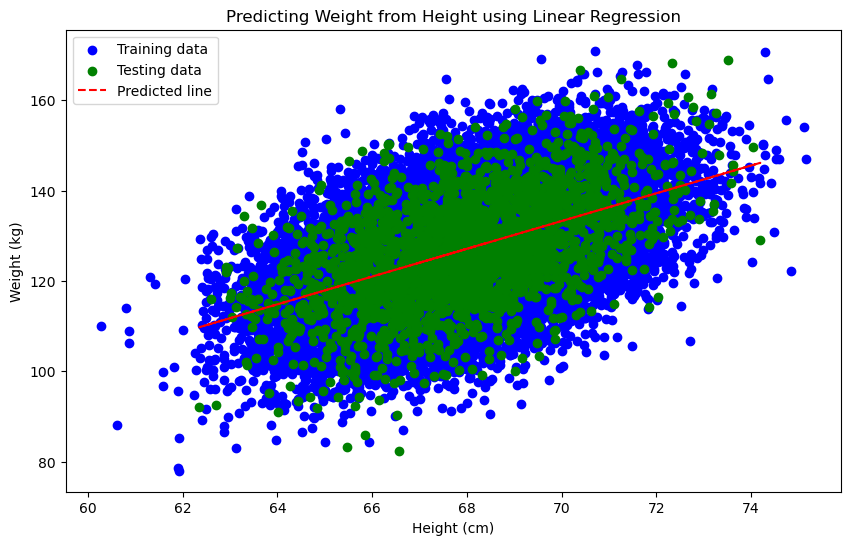

In [20]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='green', label='Testing data')
plt.plot(X_test, y_pred, color='red', linestyle='--', label='Predicted line')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.title('Predicting Weight from Height using Linear Regression')
plt.legend()
plt.show()

As we can see, the linear regression model does not fit very well. Can we think of why that is? What are the key differences between the real values and the predictions given our plotted graph?

Hint: Let's consider our dataset, if someone is small, do they *always* weigh in proportion to their height?

*write your answer here*

# Part 2: Multivariable Linear Regression

Using Indian agricultural data, we will now predict crop production using multiple linear regression, so we use more than one independent variable. Details about the dataset can be [found here](https://data.world/thatzprem/agriculture-india).

We don't need to import the libraries again this time, as we did in the first section. So we can start with loading and exploring the dataset.

In [21]:
# load the data into a pandas dataframe
df = pd.read_csv("data/crop_production.csv")
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


let's explore the dataset to see what we are working with.

In [22]:
df['Crop_Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2010, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014, 2015])

In [23]:
# how many different years are there in the dataset?
len(df['Crop_Year'].unique())

19

In [24]:
# Let's see the state with highest production, from this we can see 178273 is the highest production
df['Production'].sort_values(ascending = False)

178273    1.250800e+09
178331    1.212000e+09
100654    1.125000e+09
100612    1.063000e+09
100149    1.059000e+09
              ...     
244128             NaN
244581             NaN
245606             NaN
245644             NaN
245865             NaN
Name: Production, Length: 246091, dtype: float64

In [25]:
df.loc[178273]

State_Name         Tamil Nadu
District_Name      COIMBATORE
Crop_Year                2011
Season            Whole Year 
Crop                 Coconut 
Area                  82704.0
Production       1250800000.0
Name: 178273, dtype: object

Can you explore some of the other variables?

*hint: State_Name, Crop, Area, Production*

In [26]:
# explore the data from each column

Since our dataframe is quite large, we can visualise more data to understand it better. [Seaborn](https://seaborn.pydata.org/tutorial/introduction.html) is a useful library for visualising data, that comes with library functions to plot heatmaps, relational plots and more.

First of all we neet to install seaborn, a library to help visualise our data

In [29]:
import seaborn as sns

# generate a matplotlib/seaborn graph to understand data better. Think about what season produces the most crops? what state produces the most crops? what crop is produced the most? etc.

We are now going to try and forecast crop values. However, due to the large number of variables we are going to focus on one crop in a specific area, in a specific season.

In [30]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


## Null Rows

This dataset is a bit diffrent to our previous one, as it has null values. Null values are field with no values, a missing value essentially. Because we use all our data for our linear regression model, the null data must be filtered out, or [imputed](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html).

In [31]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [32]:
null_rows = df[df.isnull().any(axis=1)]
null_rows

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,NaN
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,NaN
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,NaN
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,NaN
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,NaN
...,...,...,...,...,...,...,...
244128,West Bengal,MEDINIPUR WEST,2010,Rabi,Peas & beans (Pulses),2.00,NaN
244581,West Bengal,MURSHIDABAD,2006,Kharif,Moong(Green Gram),200.00,NaN
245606,West Bengal,PURULIA,2001,Rabi,Rapeseed &Mustard,427.00,NaN
245644,West Bengal,PURULIA,2002,Rabi,Rapeseed &Mustard,522.00,NaN


In [33]:
print(len(df))

# the 'any' parameter means that if any of the columns in the row are null, then drop the row. 'all' would mean that all columns in the row are null
df.dropna(how='any', inplace=True)

print(len(df))

246091
242361


## Model Creation and Evaluation

Because we have so many different categorical data, as our example we will be predicting the Production of rice in the "Coimbatore" district, using the area and crop year as our independent variables.

In [34]:
# filter the dataset for coconut data only
coconut_data = df[(df['Crop'] == 'Rice') & (df['District_Name'] == 'COIMBATORE')]

# select the two independent variables for our model
X = coconut_data[['Area', 'Crop_Year']]

# target variable (dependent variable)
y = coconut_data['Production']

coconut_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
177822,Tamil Nadu,COIMBATORE,1997,Whole Year,Rice,18703.0,57670.0
177840,Tamil Nadu,COIMBATORE,1998,Kharif,Rice,15034.0,51575.0
177871,Tamil Nadu,COIMBATORE,1999,Kharif,Rice,16875.0,60494.0
177901,Tamil Nadu,COIMBATORE,2000,Kharif,Rice,12170.0,47066.0
177926,Tamil Nadu,COIMBATORE,2001,Kharif,Rice,10548.0,37200.0
177943,Tamil Nadu,COIMBATORE,2002,Kharif,Rice,6577.0,22152.0
178002,Tamil Nadu,COIMBATORE,2003,Kharif,Rice,3654.0,10643.0
178063,Tamil Nadu,COIMBATORE,2004,Kharif,Rice,7239.0,24454.0
178093,Tamil Nadu,COIMBATORE,2005,Kharif,Rice,7406.0,20665.0
178113,Tamil Nadu,COIMBATORE,2006,Kharif,Rice,6221.0,24009.0


In [35]:
# split the data into trainingand testing sets.
# we are using the crop year as the split, so all data before 2010 is training data and all data after 2010 is testing data
X_train, X_test = X[coconut_data['Crop_Year'] <= 2010], X[coconut_data['Crop_Year'] > 2010]
y_train, y_test = y[coconut_data['Crop_Year'] <= 2010], y[coconut_data['Crop_Year'] > 2010]

# train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predict on the testing set (2011, 2012, 2013)
y_pred = model.predict(X_test)

In [36]:
X_train

,Area,Crop_Year
177822,18703.0,1997
177840,15034.0,1998
177871,16875.0,1999
177901,12170.0,2000
177926,10548.0,2001
177943,6577.0,2002
178002,3654.0,2003
178063,7239.0,2004
178093,7406.0,2005
178113,6221.0,2006


In [37]:
# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}\n")

# forecast coconut production for the next 3 years
forecasted_production = model.predict(X_test)
for year, actual, forecast in zip(X_test['Crop_Year'], y_test, forecasted_production):
  print(f"Year: {int(year)}, Actual: {actual}, Forecasted: {forecast}")

Mean Squared Error: 10941324.432073407
R^2 Score: -7.26271271549054

Year: 2011, Actual: 10486.0, Forecasted: 13421.566720280214
Year: 2012, Actual: 7890.0, Forecasted: 12186.117105561309
Year: 2013, Actual: 10139.0, Forecasted: 12536.87387956644


# Part 3: Logistic Regression

For this section, we will be using the [Titanic dataset](https://www.kaggle.com/competitions/titanic) from the Seaborn library, which is a popular dataset for multi-classification problems, when you want to predict which class data belongs to, rather than a value. This dataset contains information about the passengers on the Titanic, including whether they survived or not. We'll use this dataset to predict survival.

In [38]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [39]:
# load in data
df = sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [40]:
# preprocessing

# drop columns that won't be used in the model
df = df.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male'], axis=1)

# handle missing values by filling them with the mean for numerical columns and mode for categorical columns (a form of imputation)
df['age'].fillna(df['age'].mean(), inplace=True)
df['fare'].fillna(df['fare'].mean(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# drop rows with any remaining missing values
df.dropna(inplace=True)

# convert categorical columns to numerical using Label Encoding
label_enc = LabelEncoder()
df['sex'] = label_enc.fit_transform(df['sex'])
df['embarked'] = label_enc.fit_transform(df['embarked'])
df['alone'] = label_enc.fit_transform(df['alone'])

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22.000000,1,0,7.2500,2,0
1,1,1,0,38.000000,1,0,71.2833,0,0
2,1,3,0,26.000000,0,0,7.9250,2,1
3,1,1,0,35.000000,1,0,53.1000,2,0
4,0,3,1,35.000000,0,0,8.0500,2,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1
887,1,1,0,19.000000,0,0,30.0000,2,1
888,0,3,0,29.699118,1,2,23.4500,2,0
889,1,1,1,26.000000,0,0,30.0000,0,1


In [41]:
# define features and target variable
X = df.drop('survived', axis=1)
y = df['survived']

# standardise the features, this allows the model to converge faster and puts the features on the same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# split the data into training and test sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [42]:
# train logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# make predictions
y_pred = model.predict(X_test)

In [ ]:
# evaluate the model

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['Not Survived', 'Survived'])
print("\nClassification Report:")
print(class_report)


Accuracy: 0.80

Confusion Matrix:
[[90 15]
 [20 54]]

Classification Report:
              precision    recall  f1-score   support

Not Survived       0.82      0.86      0.84       105
    Survived       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [ ]:
# visualise the confusion matrix
fig, ax = plt.subplots()
cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion matrix', pad=20)
fig.colorbar(cax)
ax.set_xticklabels([''] + ['Not Survived', 'Survived'])
ax.set_yticklabels([''] + ['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

If you are unsure of what any of the terms mentioned do, don't hesitate to google them! Machine learning can be tricky when it comes to all the sophisticated jargon used.

# Discussion

Why do you think the data is hard to forecast? The correlation value is poor. Is the relationships between seasons, area, and crops all linear? What trends are there over time? Plot graphs and do some data engineering work to come to conclusions.

*Hint: Dataset size, non-linear relationships*

# Misc

If you are using VSCode, [Data Wrangler](https://code.visualstudio.com/docs/datascience/data-wrangler) is a great tool to use for analysing dataframes!

## Exercise

Now try to analyse the crop data yourself to fit models, and better understand the relationships between the data. There is no right or wrong answer, the goal is to explore as much as possible and find a model that forecasts crop production well!

In [ ]:
# code here

# Extension

- Look into **ridge regression**, why is it used over linear regression?
- What is **dimensionality reduction**? Specifically, when do we use **Principal Component Analysis**? Can you find a dataset where you might use it?
- What is **normalisation**? What are the benefits of it? When is it implemented?
- When we have a lot of features, we might use **Pearson or Spearman correlation** to work out the features that best correlate to our dependent variable? What exactly is Pearson and Spearman and when might you use one over the other? 